# SABR Model Test Code

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import imp
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(sys.path.index('')+1, 'D:/Github/PyFENG')
import pyfeng as pf
import option_models as opt
pf

<module 'pyfeng' from '/Users/cescqi/PycharmProjects/venvCollection/phbs/lib/python3.7/site-packages/pyfeng/__init__.py'>

## 1. Pricing using Hagan's formula (provided)

### (1) SABR for $0<\beta\le 1$

In [3]:
# Parameters
strike = np.linspace(75,125,num=25)
forward = 100
sigma = 0.2
texp = 1
vov = 0.5
rho = 0.25
beta = 1

In [4]:
# Create model
sabr_bsm = pf.SabrHagan2002(sigma, vov=vov, rho=rho, beta=beta)
#sabr_bsm.__dict__

In [5]:
# This is how you price. you can get either price or bsm_vol
price = sabr_bsm.price(strike, forward, texp)
bsm_vol = sabr_bsm.vol_smile(strike, forward, texp)

price, bsm_vol

(array([25.63112985, 23.75128418, 21.92436819, 20.15929844, 18.464919  ,
        16.84954379, 15.32049449, 13.88369006, 12.5433379 , 11.30176115,
        10.15937353,  9.11479108,  8.16505218,  7.30590775,  6.53214252,
         5.83789336,  5.21693965,  4.66295032,  4.1696811 ,  3.73112202,
         3.34159961,  2.99584057,  2.68900456,  2.4166934 ,  2.17494321]),
 array([0.20400581, 0.20266888, 0.20161986, 0.20085527, 0.2003692 ,
        0.20015312, 0.20019595, 0.20048427, 0.20100266, 0.20173418,
        0.20266088, 0.20376432, 0.20502604, 0.20642803, 0.20795302,
        0.20958477, 0.2113082 , 0.21310949, 0.21497615, 0.21689693,
        0.2188618 , 0.22086191, 0.22288945, 0.22493758, 0.22700034]))

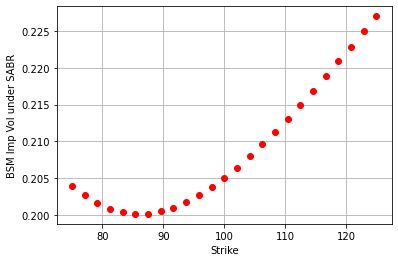

In [6]:
# volatility smile plot: try with different parameters
plt.plot(strike, bsm_vol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('BSM Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

### (2) SABR for $\beta=0$

In [7]:
strike = np.linspace(75,125,num=25)
#strike = 1
forward = 100
sigma = 20
texp = 1
alpha = 0.5
rho = -0.25

In [8]:
sabr_norm = pf.SabrHagan2002(sigma, vov=vov, rho=rho, beta=0)
price = sabr_norm.price(strike, forward, texp)
nvol = sabr_norm.vol_smile(strike, forward, texp, model='norm')

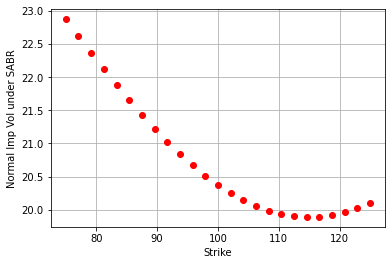

In [9]:
plt.plot(strike, nvol, 'ro')
#plt.axis([0, 6, 0, 20])
plt.ylabel('Normal Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

### (3) Smile calibration to 3 options

In [10]:
strike3 = np.array([90, 100, 110])
price3 = sabr_bsm.price(strike3, forward, texp)
vol3 = sabr_bsm.vol_smile(strike3, forward, texp)

price3, vol3

(array([13.60780137,  8.16505218,  4.76869334]),
 array([0.20057006, 0.20502604, 0.21274362]))

In [11]:
sabr_bsm.__dict__

{'sigma': 0.2,
 'intr': 0.0,
 'divr': 0.0,
 'is_fwd': False,
 'vov': 0.5,
 'rho': 0.25,
 'beta': 1}

In [12]:
# makre sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(vol3, strike3, forward, texp, is_vol=True)

{'sigma': 0.2000000000001008,
 'vov': 0.4999999998672808,
 'rho': 0.24999999998258432}

In [13]:
# makre sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(price3, strike3, forward, texp, is_vol=False)

{'sigma': 0.19999999979636335,
 'vov': 0.5000000129299839,
 'rho': 0.2499999894054446}

## 2. Pricing under MC method

In [14]:
strike = np.linspace(75,125,num=25)
forward = 100

In [15]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_mc = opt.sabr.ModelBsmMC(sabr_bsm.sigma, vov=sabr_bsm.vov, rho=sabr_bsm.rho, beta=1)

{'sigma': 0.2, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': 0.25, 'beta': 1}


In [16]:
price_hagan = sabr_bsm.price(strike, forward, texp)
price_mc = sabr_bsm_mc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([25.63112985, 23.75128418, 21.92436819, 20.15929844, 18.464919  ,
        16.84954379, 15.32049449, 13.88369006, 12.5433379 , 11.30176115,
        10.15937353,  9.11479108,  8.16505218,  7.30590775,  6.53214252,
         5.83789336,  5.21693965,  4.66295032,  4.1696811 ,  3.73112202,
         3.34159961,  2.99584057,  2.68900456,  2.4166934 ,  2.17494321]),
 array([26.44283012, 24.56133486, 22.72635442, 20.94941933, 19.23700414,
        17.60188731, 16.0522217 , 14.59214707, 13.22760969, 11.96648274,
        10.80234709,  9.7366939 ,  8.76612855,  7.88523356,  7.08887739,
         6.37107282,  5.72644575,  5.1468472 ,  4.62316308,  4.15059107,
         3.73045166,  3.35586496,  3.02373736,  2.72881899,  2.46829491]))

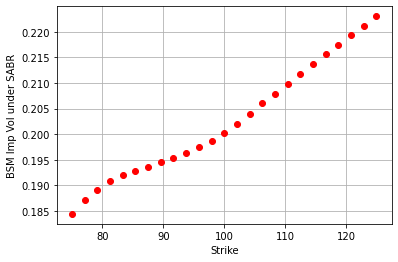

In [17]:
plt.plot(strike, sabr_bsm_mc.bsm_vol(strike, forward, texp), 'ro')
plt.ylabel('BSM Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

Repeat the same for beta = 0

In [18]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_mc = opt.sabr.ModelNormalMC(sabr_norm.sigma, vov=sabr_norm.vov, rho=sabr_norm.rho, beta=0)

{'sigma': 20, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': -0.25, 'beta': 0}


In [19]:
price_hagan = sabr_norm.price(strike, forward, texp)
price_mc = sabr_norm_mc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([26.59094359, 24.75316491, 22.95198866, 21.19221774, 19.47903728,
        17.81796274, 16.21475835, 14.6753216 , 13.20553214, 11.81106589,
        10.49717985,  9.26847793,  8.12867327,  7.08036718,  6.12486688,
         5.26206391,  4.4903905 ,  3.80686327,  3.2072135 ,  2.6860921 ,
         2.2373286 ,  1.85421785,  1.52980713,  1.25715953,  1.02957603]),
 array([26.4714095 , 24.63346717, 22.83635187, 21.08109784, 19.37272157,
        17.71453177, 16.11416255, 14.57540748, 13.10710337, 11.71180772,
        10.39397511,  9.16342781,  8.02275197,  6.97554887,  6.02117975,
         5.16342373,  4.39666443,  3.71315309,  3.11335747,  2.58691062,
         2.13412543,  1.74888625,  1.4284537 ,  1.15700918,  0.93196039]))

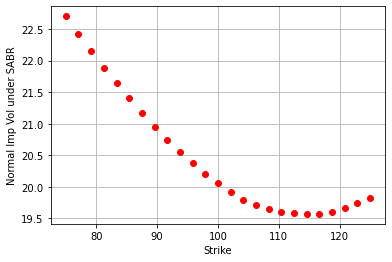

In [20]:
plt.plot(strike, sabr_norm_mc.norm_vol(strike, forward, texp), 'ro')
plt.ylabel('Normal Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

## 3. Pricing under conditional MC method

In [21]:
strike = np.linspace(75,125,num=25)
forward = 100

In [22]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_cmc = opt.sabr.ModelBsmCondMC(sabr_bsm.sigma, vov=sabr_bsm.vov, rho=sabr_bsm.rho, beta=1)

{'sigma': 0.2, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': 0.25, 'beta': 1}


In [23]:
price_hagan = sabr_bsm.price(strike, forward, texp)
price_mc = sabr_bsm_cmc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([25.63112985, 23.75128418, 21.92436819, 20.15929844, 18.464919  ,
        16.84954379, 15.32049449, 13.88369006, 12.5433379 , 11.30176115,
        10.15937353,  9.11479108,  8.16505218,  7.30590775,  6.53214252,
         5.83789336,  5.21693965,  4.66295032,  4.1696811 ,  3.73112202,
         3.34159961,  2.99584057,  2.68900456,  2.4166934 ,  2.17494321]),
 array([25.64026354, 23.76162931, 21.93599885, 20.17218061, 18.47888858,
        16.8642986 , 15.33560341, 13.89861905, 12.55748946, 11.31452104,
        10.1701578 ,  9.12308713,  8.17044921,  7.3081147 ,  6.53099353,
         5.83334267,  5.20904861,  4.65186956,  4.15563058,  3.71437103,
         3.32244834,  2.97460415,  2.66599994,  2.39222921,  2.14931227]))

Repeat the same for beta = 0

In [24]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_cmc = opt.sabr.ModelNormalCondMC(sabr_norm.sigma, vov=sabr_norm.vov, rho=sabr_norm.rho, beta=0)

{'sigma': 20, 'intr': 0.0, 'divr': 0.0, 'is_fwd': False, 'vov': 0.5, 'rho': -0.25, 'beta': 0}


In [25]:
price_hagan = sabr_norm.price(strike, forward, texp)
price_mc = sabr_norm_cmc.price(strike, forward, texp)

# make sure the two prices are similar
price_hagan, price_mc

(array([26.59094359, 24.75316491, 22.95198866, 21.19221774, 19.47903728,
        17.81796274, 16.21475835, 14.6753216 , 13.20553214, 11.81106589,
        10.49717985,  9.26847793,  8.12867327,  7.08036718,  6.12486688,
         5.26206391,  4.4903905 ,  3.80686327,  3.2072135 ,  2.6860921 ,
         2.2373286 ,  1.85421785,  1.52980713,  1.25715953,  1.02957603]),
 array([26.56721584, 24.72884097, 22.92749354, 21.16801744, 19.45562542,
        17.79584261, 16.19442044, 14.65721777, 13.19004772, 11.79849227,
        10.4876905 ,  9.26211105,  8.12532432,  7.07979332,  6.12670423,
         5.26585629,  4.49562659,  3.81301761,  3.21378598,  2.69264124,
         2.24349507,  1.85973662,  1.53450861,  1.26096171,  1.03247035]))

## Compare the MC variance between brute-force MC and conditional MC
For this, you should not use the random number seed

In [26]:
n_repeat = 10

price_bsm_mc = [None] * n_repeat
price_bsm_cmc = [None] * n_repeat

for i in range(n_repeat):
    price_bsm_mc[i] = sabr_bsm_mc.price(strike, forward, texp)
    price_bsm_cmc[i] = sabr_bsm_cmc.price(strike, forward, texp)
    
bsm_mc_var = np.var(price_bsm_mc, axis = 0)
bsm_cmc_var = np.var(price_bsm_cmc, axis = 0)

In [27]:
bsm_mc_var, bsm_cmc_var

(array([0.01162249, 0.01133623, 0.01101719, 0.01063464, 0.01007307,
        0.00974727, 0.00964304, 0.0098641 , 0.00983187, 0.00938069,
        0.00887483, 0.00858416, 0.00843864, 0.00822772, 0.00818915,
        0.0080175 , 0.00801859, 0.00792453, 0.00804097, 0.00812646,
        0.00825361, 0.00803302, 0.00769411, 0.00734965, 0.00685023]),
 array([1.02189359e-04, 1.01858494e-04, 1.01443119e-04, 1.00977032e-04,
        1.00502544e-04, 1.00062405e-04, 9.96891919e-05, 9.93950981e-05,
        9.91653496e-05, 9.89573342e-05, 9.87055798e-05, 9.83310022e-05,
        9.77520003e-05, 9.68950265e-05, 9.57028817e-05, 9.41398130e-05,
        9.21932715e-05, 8.98727814e-05, 8.72067043e-05, 8.42377857e-05,
        8.10182900e-05, 7.76053505e-05, 7.40569477e-05, 7.04287297e-05,
        6.67717297e-05]))

In [28]:
n_repeat = 10

price_norm_mc = [None] * n_repeat
price_norm_cmc = [None] * n_repeat

for i in range(n_repeat):
    price_norm_mc[i] = sabr_norm_mc.price(strike, forward, texp)
    price_norm_cmc[i] = sabr_norm_cmc.price(strike, forward, texp)
    
norm_mc_var = np.var(price_norm_mc, axis = 0)
norm_cmc_var = np.var(price_norm_cmc, axis = 0)

In [29]:
norm_mc_var, norm_cmc_var

(array([0.03313486, 0.0313049 , 0.02950827, 0.02810243, 0.02654906,
        0.02542765, 0.02402108, 0.02210599, 0.01995057, 0.0178314 ,
        0.01602487, 0.01442413, 0.0129308 , 0.01113883, 0.00950474,
        0.00803352, 0.00674645, 0.00558994, 0.00459686, 0.00369348,
        0.00288288, 0.00227294, 0.00181983, 0.00147276, 0.00124529]),
 array([1.07698516e-05, 9.80554725e-06, 8.90093270e-06, 8.05602377e-06,
        7.26828249e-06, 6.53361715e-06, 5.84777712e-06, 5.20787691e-06,
        4.61364566e-06, 4.06795777e-06, 3.57633448e-06, 3.14542837e-06,
        2.78091176e-06, 2.48548104e-06, 2.25766435e-06, 2.09174775e-06,
        1.97861636e-06, 1.90697076e-06, 1.86442487e-06, 1.83833156e-06,
        1.81650821e-06, 1.78809149e-06, 1.74453684e-06, 1.68051248e-06,
        1.59434552e-06]))

### Conclusion
Conditional MC has much lower variance.